* Download and install 'ffmpeg' codec on your PC - this is mandatory for animations to run properly!!!
* Link to 'ffmpeg' codec: ( http://ffmpeg.org/download.html )
* Link to the ffmpeg installation tutorial: ( http://blog.gregzaal.com/how-to-install-ffmpeg-on-windows/ )

<IPython.core.display.Javascript object>


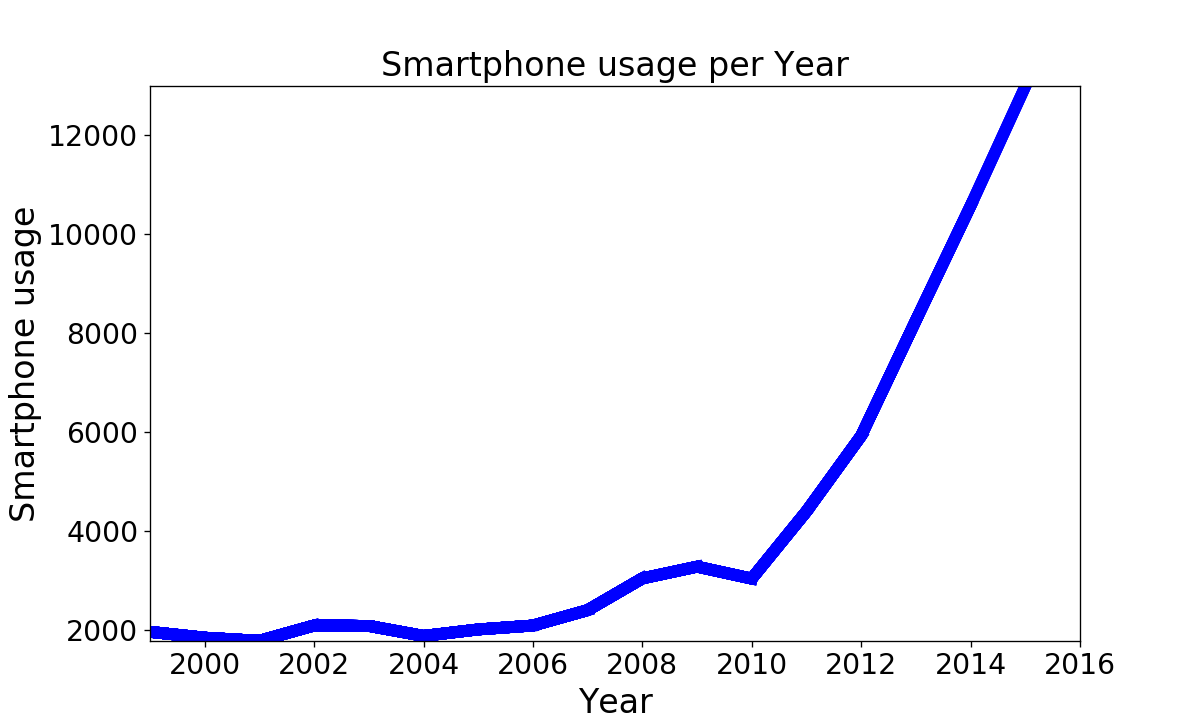

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#=================================================================================================================

smusage = pd.read_excel('D:/smusage.xls',sheetname='Online',skiprows =6)

def get_data(table,rownum,title):
    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)
    data.columns = {title}
    return data

%matplotlib notebook
title = 'Smartphone usage'
d = get_data(smusage,18,title)
x = np.array(d.index)
y = np.array(d['Smartphone usage'])
smusage = pd.DataFrame(y,x)
#XN,YN = augment(x,y,10)
#augmented = pd.DataFrame(YN,XN)
smusage.columns = {title}

Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

fig = plt.figure(figsize=(10,6))
plt.xlim(1999, 2016)
plt.ylim(np.min(smusage)[0], np.max(smusage)[0])
plt.xlabel('Year',fontsize=20)
plt.ylabel(title,fontsize=20)
plt.title('Smartphone usage per Year',fontsize=20)


Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)


def animate(i):
    
    data = smusage.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data.index, y=data[title], data=data, color="b")
    
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17, repeat=True)
ani
#ani.save('HeroinOverdosesJumpy.mp4', writer=writer)